## PIC 16A Final Project

In [22]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import tree, preprocessing
import numpy as np
import sklearn
from sklearn.model_selection import cross_val_score, train_test_split
import os
import importlib
from Created_Class import classifier
url = 'https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv'
penguins = pd.read_csv(url)

In [3]:
penguins

studyName  Sample Number                              Species  Region  \
0     PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1     PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2     PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3     PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4     PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   
..        ...            ...                                  ...     ...   
339   PAL0910            120    Gentoo penguin (Pygoscelis papua)  Anvers   
340   PAL0910            121    Gentoo penguin (Pygoscelis papua)  Anvers   
341   PAL0910            122    Gentoo penguin (Pygoscelis papua)  Anvers   
342   PAL0910            123    Gentoo penguin (Pygoscelis papua)  Anvers   
343   PAL0910            124    Gentoo penguin (Pygoscelis papua)  Anvers   

        Island               Stage Individual ID Clutch Completion  Date Egg  \
0    Torgersen  Adult, 1 Egg Stage          N1A1               Yes  11/11/07   
1    Torgersen  Adult, 1 Egg Stage          N1A2               Yes  11/11/07   
2    Torgersen  Adult, 1 Egg Stage          N2A1               Yes  11/16/07   
3    Torgersen  Adult, 1 Egg Stage          N2A2               Yes  11/16/07   
4    Torgersen  Adult, 1 Egg Stage          N3A1               Yes  11/16/07   
..         ...                 ...           ...               ...       ...   
339     Biscoe  Adult, 1 Egg Stage         N38A2                No   12/1/09   
340     Biscoe  Adult, 1 Egg Stage         N39A1               Yes  11/22/09   
341     Biscoe  Adult, 1 Egg Stage         N39A2               Yes  11/22/09   
342     Biscoe  Adult, 1 Egg Stage         N43A1               Yes  11/22/09   
343     Biscoe  Adult, 1 Egg Stage         N43A2               Yes  11/22/09   

     Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0                  39.1               18.7                181.0   
1                  39.5               17.4                186.0   
2                  40.3               18.0                195.0   
3                   NaN                NaN                  NaN   
4                  36.7               19.3                193.0   
..                  ...                ...                  ...   
339                 NaN                NaN                  NaN   
340                46.8               14.3                215.0   
341                50.4               15.7                222.0   
342                45.2               14.8                212.0   
343                49.9               16.1                213.0   

     Body Mass (g)     Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0           3750.0    MALE                NaN                NaN   
1           3800.0  FEMALE            8.94956          -24.69454   
2           3250.0  FEMALE            8.36821          -25.33302   
3              NaN     NaN                NaN                NaN   
4           3450.0  FEMALE            8.76651          -25.32426   
..             ...     ...                ...                ...   
339            NaN     NaN                NaN                NaN   
340         4850.0  FEMALE            8.41151          -26.13832   
341         5750.0    MALE            8.30166          -26.04117   
342         5200.0  FEMALE            8.24246          -26.11969   
343         5400.0    MALE            8.36390          -26.15531   

                           Comments  
0    Not enough blood for isotopes.  
1                               NaN  
2                               NaN  
3                Adult not sampled.  
4                               NaN  
..                              ...  
339                             NaN  
340                             NaN  
341                             NaN  
342                             NaN  
343                             NaN  

[344 rows x 17 columns]

In [4]:
penguins = penguins[["Culmen Length (mm)", "Flipper Length (mm)", "Body Mass (g)", "Sex", "Island", "Species"]]

In [5]:
penguins = penguins.dropna()
penguins = penguins[penguins["Sex"] != "."]

In [6]:
import seaborn as sns 
def EDA(data, split_by):
    if split_by in data._get_numeric_data().columns:
        raise TypeError("split_by must be a categorical varaible from the dataset!")
    print("\n Quantitative Varaible Analysis")
    sns.pairplot(data, hue=split_by)  
    plt.show()
    print(data.describe())
    categorical_data = data[set(list(data.columns)) - set(list(data._get_numeric_data().columns))]
    categorical_data= categorical_data.drop(split_by, axis = 1)
    sns.heatmap(data.corr(), cmap="YlGnBu")
    plt.show()
    print("\n Categorical Varaible Analysis")
    for i in range(categorical_data.shape[1]):
        sns.countplot(x=categorical_data.iloc[:,i], hue = data[split_by])
        plt.show()


 Quantitative Varaible Analysis


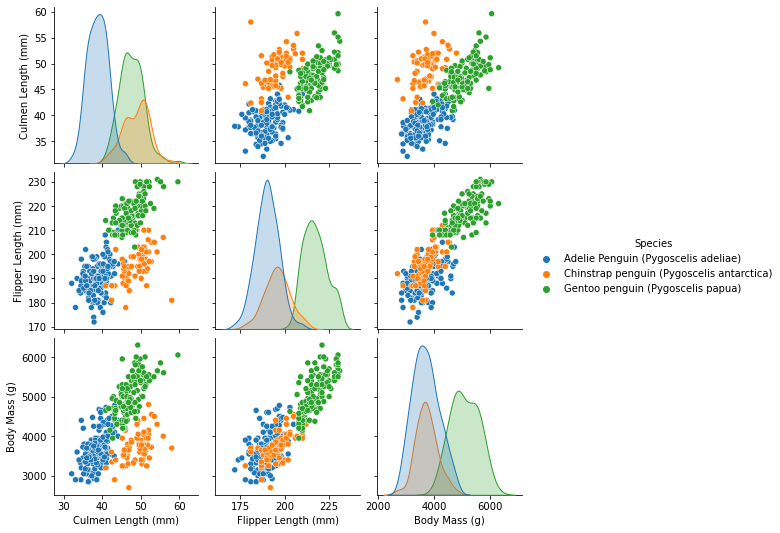

       Culmen Length (mm)  Flipper Length (mm)  Body Mass (g)
count          333.000000           333.000000     333.000000
mean            43.992793           200.966967    4207.057057
std              5.468668            14.015765     805.215802
min             32.100000           172.000000    2700.000000
25%             39.500000           190.000000    3550.000000
50%             44.500000           197.000000    4050.000000
75%             48.600000           213.000000    4775.000000
max             59.600000           231.000000    6300.000000


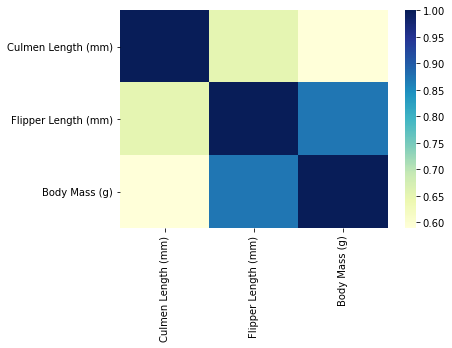


 Categorical Varaible Analysis


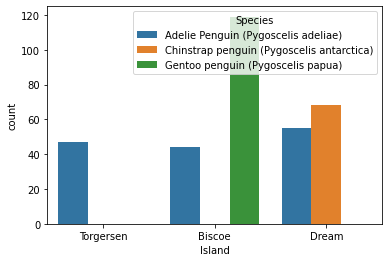

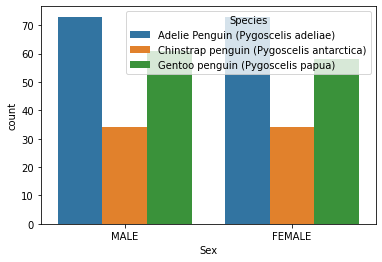

In [7]:
EDA(penguins, "Species")

In [8]:
from sklearn.preprocessing import LabelEncoder
spec_enc = LabelEncoder()
sex_enc = LabelEncoder()
penguins["Species"]=spec_enc.fit_transform(penguins["Species"])
penguins['Sex'] = sex_enc.fit_transform(penguins['Sex'])
penguins['Island'] = sex_enc.fit_transform(penguins['Island'])

In [9]:
penguins

Culmen Length (mm)  Flipper Length (mm)  Body Mass (g)  Sex  Island  \
0                  39.1                181.0         3750.0    1       2   
1                  39.5                186.0         3800.0    0       2   
2                  40.3                195.0         3250.0    0       2   
4                  36.7                193.0         3450.0    0       2   
5                  39.3                190.0         3650.0    1       2   
..                  ...                  ...            ...  ...     ...   
338                47.2                214.0         4925.0    0       0   
340                46.8                215.0         4850.0    0       0   
341                50.4                222.0         5750.0    1       0   
342                45.2                212.0         5200.0    0       0   
343                49.9                213.0         5400.0    1       0   

     Species  
0          0  
1          0  
2          0  
4          0  
5          0  
..       ...  
338        2  
340        2  
341        2  
342        2  
343        2  

[333 rows x 6 columns]

In [10]:
def my_train_test_split_(data, split_threshold = .8):
    np.random.seed(1)
    random_data_shuffle = data.sample(data.shape[0])
    train = random_data_shuffle.iloc[0:int(data.shape[0]*split_threshold),:]
    test = random_data_shuffle.iloc[int(data.shape[0]*split_threshold):,:]
    return train, test

In [11]:
train, test = my_train_test_split_(penguins)

In [12]:
B = classifier("Decision Tree", train, test, ["Flipper Length (mm)", "Body Mass (g)"], "Species")

In [13]:
B.training_accuracy()

0.849624060150376


In [14]:
B.cross_validate()

0.7632424877707897


In [15]:
B.cross_validate_for_hyperparameter(1,15)

0.7782669461914745
0.7895877009084555
0.7932914046121594
0.7707197763801538
0.7669461914744934
0.7443745632424877
0.763172606568833
0.7445143256464011
0.7634521313766598
0.7445143256464011
0.7407407407407408
0.7520614954577219
0.7445842068483579
0.7519916142557652
0.7482879105520615


In [16]:
B = classifier("Decision Tree", train, test, ["Flipper Length (mm)", "Body Mass (g)"], "Species", 3)
B.training_accuracy()
B.cross_validate()

0.8082706766917294
0.7932914046121594


In [17]:
A = classifier("KNN", train, test, ["Flipper Length (mm)", "Body Mass (g)"], "Species")

TypeError: 

In [ ]:
A.training_accuracy()